## 3-1-1 Contact Centre Metrics Dataset

```markdown
## Disclaimer
```
This notebook was created by **Yihua Cai [cai.yihu@northeastern.edu]**.
```
The analysis and results presented in this notebook are based on the 3-1-1 Contact Centre Metrics Dataset. The interpretations and conclusions drawn from the data are my own and do not represent the views or opinions of any organization. The code and methods used are for educational and illustrative purposes only.
```

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data cleaning

In [2]:
# Load the dataset
df = pd.read_csv('3-1-1-contact-centre-metrics.csv', delimiter=';')

# Display the first few rows of the dataset
df.head()

,Date,CallsOffered,CallsHandled,CallsAbandoned,AverageSpeedofAnswer,ServiceLevel,BI_ID
0,2024-08-31,418,399,17,25.421053,0.826829,1
1,2024-08-30,1059,975,72,70.466667,0.712223,2
2,2024-08-29,1118,1086,27,22.876611,0.870036,3
3,2024-08-28,1129,1058,65,52.136106,0.754069,4
4,2024-08-27,1204,1134,61,65.505291,0.733898,5


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

print(df.info())

# Basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5555 entries, 2024-08-31 to 2009-06-15
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CallsOffered          5555 non-null   int64  
 1   CallsHandled          5555 non-null   int64  
 2   CallsAbandoned        5555 non-null   int64  
 3   AverageSpeedofAnswer  5555 non-null   float64
 4   ServiceLevel          5555 non-null   float64
 5   BI_ID                 5555 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 303.8 KB
None
       CallsOffered  CallsHandled  CallsAbandoned  AverageSpeedofAnswer  \
count   5555.000000   5555.000000     5555.000000           5555.000000   
mean    1827.705491   1646.992979      133.949235             54.735140   
std      958.298367    846.466526      141.728036             54.728551   
min      109.000000    104.000000        0.000000              0.000000   
25%     1024.500000    929.000000   

### ASA and SLA Distribution

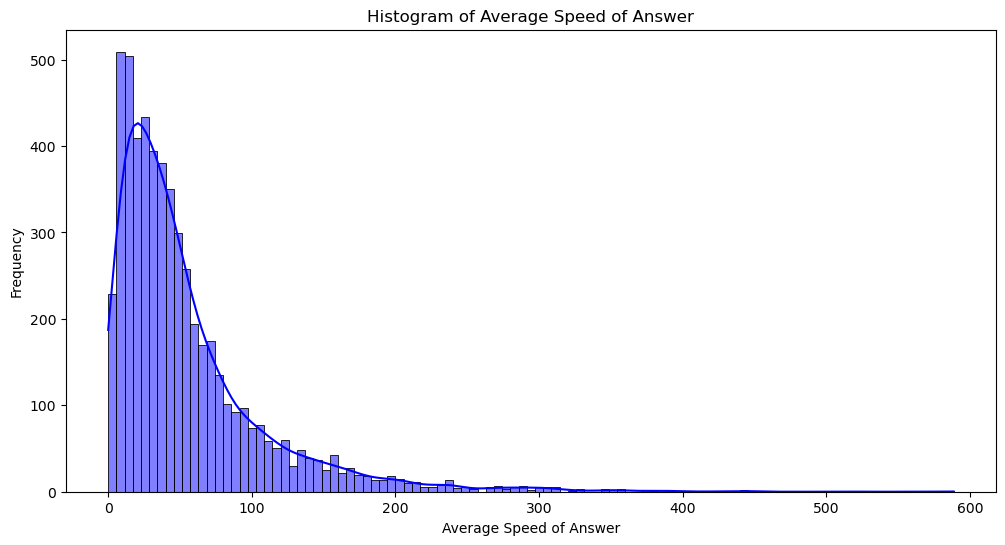

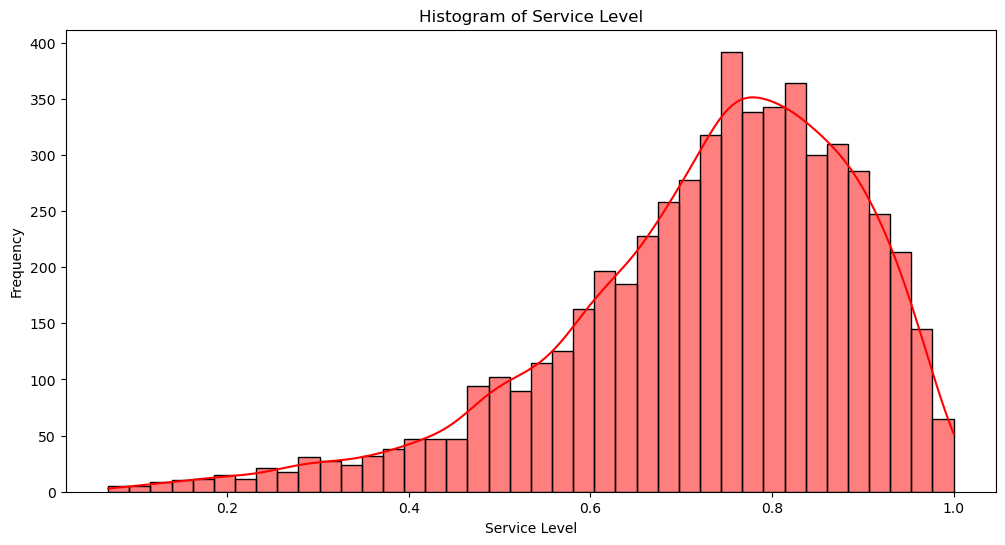

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['AverageSpeedofAnswer'], kde=True, color='blue')
plt.title('Histogram of Average Speed of Answer')
plt.xlabel('Average Speed of Answer')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['ServiceLevel'], kde=True, color='red')
plt.title('Histogram of Service Level')
plt.xlabel('Service Level')
plt.ylabel('Frequency')
plt.show()

### Correlation Coefficients

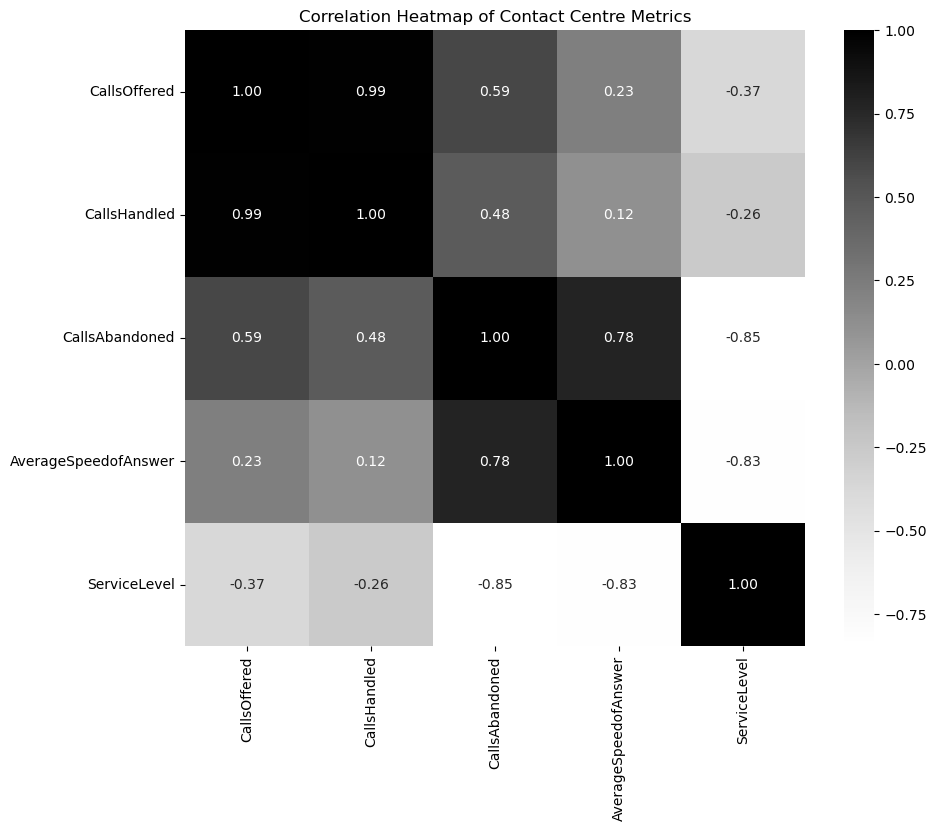

In [5]:
# Select relevant columns for correlation analysis
correlation_columns = ['CallsOffered', 'CallsHandled', 'CallsAbandoned', 'AverageSpeedofAnswer', 'ServiceLevel']
correlation_data = df[correlation_columns]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt=".2f")
plt.title('Correlation Heatmap of Contact Centre Metrics')
plt.show()

### Two-Way ANOVA

                                                      sum_sq      df  \
C(CallsAbandoned_Cat)                              18.093168     2.0   
C(AverageSpeedofAnswer_Cat)                        24.278188     2.0   
C(CallsAbandoned_Cat):C(AverageSpeedofAnswer_Cat)   1.538748     4.0   
Residual                                           38.528981  5546.0   

                                                             F        PR(>F)  
C(CallsAbandoned_Cat)                              1302.197854  0.000000e+00  
C(AverageSpeedofAnswer_Cat)                        1747.344813  0.000000e+00  
C(CallsAbandoned_Cat):C(AverageSpeedofAnswer_Cat)    55.373245  7.419775e-46  
Residual                                                   NaN           NaN  


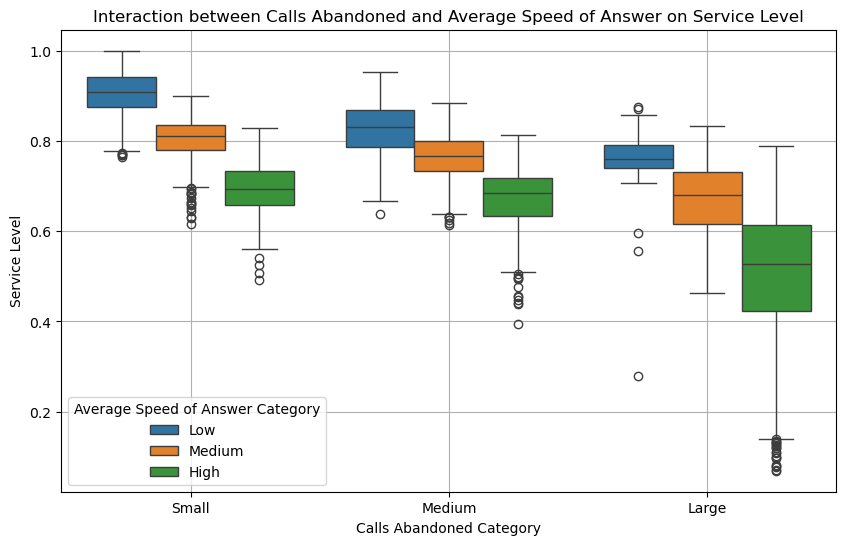

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create categories for CallsAbandoned and AverageSpeedofAnswer
# Example: binning into 'Low', 'Medium', 'High' based on quantiles
df['CallsAbandoned_Cat'] = pd.qcut(df['CallsAbandoned'], q=3, labels=['Small', 'Medium', 'Large'])
df['AverageSpeedofAnswer_Cat'] = pd.qcut(df['AverageSpeedofAnswer'], q=3, labels=['Low', 'Medium', 'High'])

# Perform two-way ANOVA
model = ols('ServiceLevel ~ C(CallsAbandoned_Cat) * C(AverageSpeedofAnswer_Cat)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Boxplot to show interaction effects
plt.figure(figsize=(10, 6))
sns.boxplot(x='CallsAbandoned_Cat', y='ServiceLevel', hue='AverageSpeedofAnswer_Cat', data=df)
plt.xlabel('Calls Abandoned Category')
plt.ylabel('Service Level')
plt.title('Interaction between Calls Abandoned and Average Speed of Answer on Service Level')
plt.legend(title='Average Speed of Answer Category')
plt.grid(True)
plt.show()

In [8]:
anova_table

,sum_sq,df,F,PR(>F)
C(CallsAbandoned_Cat),18.093168,2.0,1302.197854,0.000000e+00
C(AverageSpeedofAnswer_Cat),24.278188,2.0,1747.344813,0.000000e+00
C(CallsAbandoned_Cat):C(AverageSpeedofAnswer_Cat),1.538748,4.0,55.373245,7.419775e-46
Residual,38.528981,5546.0,NaN,NaN


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
   CallsA_Large_ASA_High     CallsA_Large_ASA_Low   0.2467    0.0  0.2075  0.2859   True
   CallsA_Large_ASA_High  CallsA_Large_ASA_Medium    0.166    0.0  0.1527  0.1792   True
   CallsA_Large_ASA_High   CallsA_Medium_ASA_High   0.1661    0.0  0.1523  0.1798   True
   CallsA_Large_ASA_High    CallsA_Medium_ASA_Low   0.3203    0.0  0.3071  0.3335   True
   CallsA_Large_ASA_High CallsA_Medium_ASA_Medium   0.2566    0.0  0.2449  0.2684   True
   CallsA_Large_ASA_High    CallsA_Small_ASA_High   0.1812    0.0  0.1553  0.2071   True
   CallsA_Large_ASA_High     CallsA_Small_ASA_Low   0.3993    0.0  0.3889  0.4096   True
   CallsA_Large_ASA_High  CallsA_Small_ASA_Medium   0.2976    0.0   0.284  0.3111   True
    CallsA_Large_ASA_

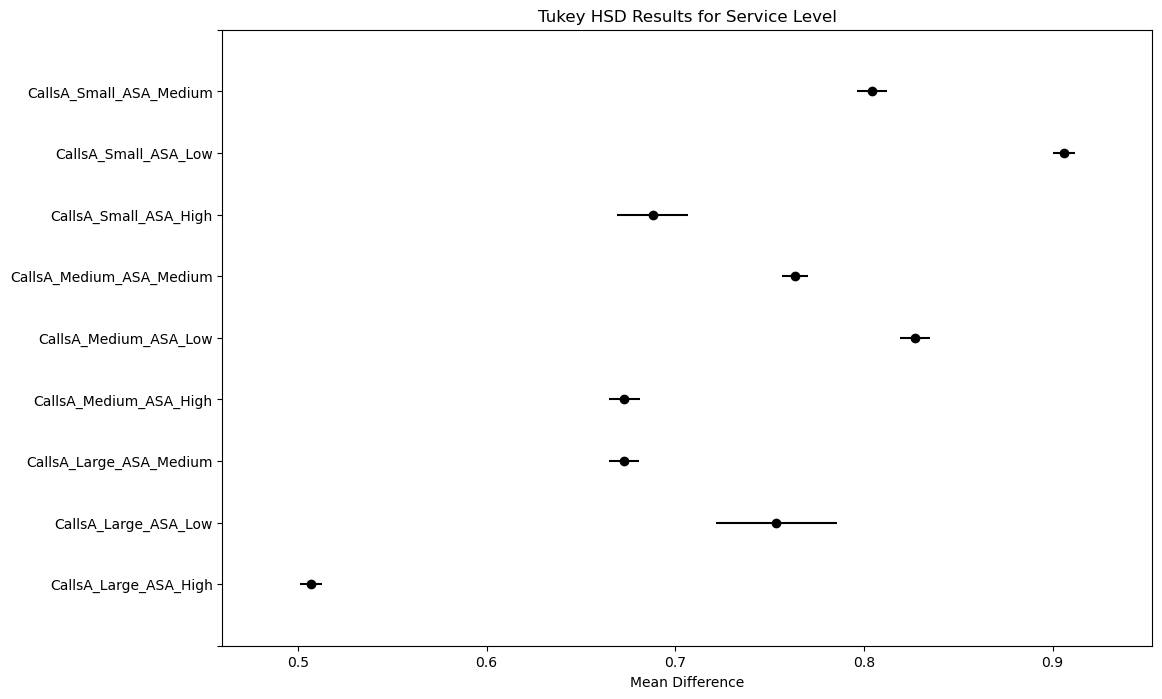

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# If significant interaction or main effects, perform Tukey's HSD
# Combining the two factors to make a single composite categorical factor
df['Composite_Group'] = "CallsA_" + df['CallsAbandoned_Cat'].astype(str) + "_" + "ASA_" + df['AverageSpeedofAnswer_Cat'].astype(str)

# Tukey's HSD on the composite groupings
tukey_result = pairwise_tukeyhsd(df['ServiceLevel'], df['Composite_Group'])
print(tukey_result)

# Visualization of the Tukey HSD results
tukey_result.plot_simultaneous(figsize=(12, 8))
plt.xlabel('Mean Difference')
plt.title('Tukey HSD Results for Service Level')
plt.show()